# 4. 감성 분석

## 4.1 사전 기반 감성 분석

In [2]:
!pip install Afinn

  Stored in directory: C:\Users\SOJINSOO\AppData\Local\pip\Cache\wheels\b5\1c\de\428301f3333ca509dcf20ff358690eb23a1388fbcbbde008b2
Successfully built Afinn


In [1]:
import pandas as pd
import glob
from afinn import Afinn
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pos_review=(glob.glob(r"데이터\aclImdb\train\pos\\*.txt"))[10]


f = open(pos_review, 'r')
lines1 = f.readlines()[0] #해당 문자열 받아옴
f.close()


afinn = Afinn() #Afinn 감성사전 사용
afinn.score(lines1)

16.0

In [3]:
lines1

'When I first read Armistead Maupins story I was taken in by the human drama displayed by Gabriel No one and those he cares about and loves. That being said, we have now been given the film version of an excellent story and are expected to see past the gloss of Hollywood...<br /><br />Writer Armistead Maupin and director Patrick Stettner have truly succeeded! <br /><br />With just the right amount of restraint Robin Williams captures the fragile essence of Gabriel and lets us see his struggle with issues of trust both in his personnel life(Jess) and the world around him(Donna).<br /><br />As we are introduced to the players in this drama we are reminded that nothing is ever as it seems and that the smallest event can change our lives irrevocably. The request to review a book written by a young man turns into a life changing event that helps Gabriel find the strength within himself to carry on and move forward.<br /><br />It\'s to bad that most people will avoid this film. I only say th

Armistead Maupins 이야기를 처음 읽었을 때 가브리엘이 보여준 인간 드라마에 관심을 보였습니다. 우리는 이제 훌륭한 이야기의 영화 버전을 받았으며 할리우드의 과거를 볼 수있을 것으로 기대됩니다 ... <br /> <br /> Armistead Maupin 작가와 Patrick Stettner 감독은 정말 성공했습니다! <br /> <br /> 제한적인 양의 구속으로 로빈 윌리엄스는 가브리엘의 허약 한 본질을 포착하고 그의 인적 생활 (Jess)과 주변 세계 (Donna)에 대한 신뢰 문제와의 투쟁을 볼 수 있습니다. <br /> <br />이 드라마에서 플레이어들에게 소개 될 때 우리는 그 어떤 것도 보이지 않으며 가장 작은 행사가 우리의 삶을 돌이킬 수 없게 바꿀 수 있음을 상기시킵니다. 청년이 쓴 책을 검토하라는 요청은 가브리엘이 자신의 힘을 찾고 앞으로 나아갈 힘을 찾는 데 도움이되는 인생을 변화시키는 사건으로 변합니다. <br /> <br /> 대부분의 사람들이 이 영화를 피하십시오. 평범한 미국인들이 아마도 "로빈 윌리엄스가 진지한 역할을합니까? 그 전에는 효과가 없었습니다!"라고 생각할뿐입니다. 이 영화에 기회를주세요! 로빈 윌리엄스는 우리 모두가 더 나은 사람이되기 위해 찾아 내야 할 어둠에 닿습니다. 그의 영화 한 시간 사진처럼 그는 배우로 발걸음을 내딛고 또 다른 고급 예술 작품을 만들었습니다. <br /> <br /> 오, 그리고 내가 잊어 버리기 전에 나는 제시가 모든 장면을 훔치는 Bobby Cannavale을 믿습니다. 1940 년대 최고의 인물 모습과 스크린 존재. 이것은 그가 지금 자신의 영화를 실을 수 있다는 의견을 해킹 한 것입니다 !! <br /> <br /> S ~ '

In [4]:
neg_review=(glob.glob(r"데이터\aclImdb\train\neg\\*.txt"))[20]


f = open(neg_review, 'r')
lines2 = f.readlines()[0]
f.close()

afinn.score(lines2)

-4.0

In [5]:
lines2

"The characters are unlikeable and the script is awful. It's a waste of the talents of Deneuve and Auteuil."

"캐릭터는 마음에 들지 않으며 대본은 끔찍합니다. Deneuve와 Auteuil의 재능을 낭비합니다."

In [19]:
#EmoLex 감성 사전 이용 
NRC=pd.read_csv(r'데이터\\nrc.txt',engine="python",header=None,sep="\t")

NRC=NRC[(NRC != 0).all(1)] #감성어와 감성표현이 유의미한 라벨들만 추출

NRC=NRC.reset_index(drop=True) #감성어와 감성표현이 유의미한 라벨들만 추출

tokenizer = RegexpTokenizer('[\w]+')

stop_words = stopwords.words('english')

p_stemmer = PorterStemmer()

raw = lines1.lower()
tokens = tokenizer.tokenize(raw)
stopped_tokens = [i for i in tokens if not i in stop_words]


match_words = [x for x in stopped_tokens if x in list(NRC[0])]


emotion=[]
for i in match_words:
    temp=list(NRC.iloc[np.where(NRC[0] == i)[0],1])
    for j in temp:
        emotion.append(j)

sentiment_result1=pd.Series(emotion).value_counts()

sentiment_result1

positive        10
negative         6
fear             6
sadness          5
trust            5
anger            3
joy              3
surprise         3
anticipation     3
disgust          1
dtype: int64

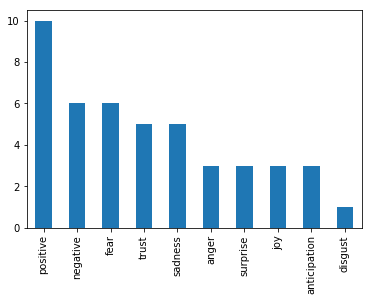

In [7]:
sentiment_result1.plot.bar()

In [25]:
raw = lines2.lower()
tokens = tokenizer.tokenize(raw)
stopped_tokens = [i for i in tokens if not i in stop_words]



match_words = [x for x in stopped_tokens if x in list(NRC[0])]


emotion=[]
for i in match_words:
    temp=list(NRC.iloc[np.where(NRC[0] == i)[0],1])
    for j in temp:
        emotion.append(j)





sentiment_result2=pd.Series(emotion).value_counts()
sentiment_result2

disgust     2
negative    2
anger       1
fear        1
sadness     1
positive    1
dtype: int64

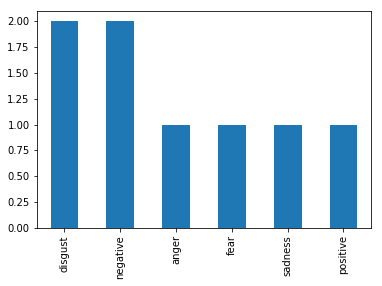

In [26]:
sentiment_result2.plot.bar()

## 4.2 지도 기계학습기반 감성 분석

In [27]:
import pandas as pd
import glob
from afinn import Afinn
from nltk.corpus import stopwords 
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
pos_review=(glob.glob(r"데이터\aclImdb\train\pos\\*.txt"))

lines_pos=[]
for i in pos_review:
    try:
        f = open(i, 'r')
        temp = f.readlines()[0]
        lines_pos.append(temp)
        f.close()
    except Exception as e:
        continue
        

neg_review=(glob.glob(r"데이터\aclImdb\train\neg\\*.txt"))

lines_neg=[]
for i in neg_review:
    try:
        f = open(i, 'r')
        temp = f.readlines()[0]
        lines_neg.append(temp)
        f.close()
    except Exception as e:
        continue
        
        
total_text=lines_pos+lines_neg #긍정, 부정 리뷰 훈련세트를 합침

x = np.array(["pos", "neg"])
class_Index=np.repeat(x, [len(lines_pos), len(lines_neg)], axis=0)


top_words = stopwords.words('english')

vect = TfidfVectorizer(stop_words=stop_words).fit(total_text)

X_train_vectorized = vect.transform(total_text)

X_train_vectorized.index = class_Index

In [30]:
from sklearn.linear_model import LogisticRegression,SGDClassifier

model = LogisticRegression()
model.fit(X_train_vectorized, class_Index)


pos_review_test=(glob.glob(r"데이터\aclImdb\test\pos\\*.txt"))[10]


test=[]
f = open(pos_review_test, 'r')
test.append(f.readlines()[0])
f.close()


predictions = model.predict(vect.transform(test))
predictions

C:\Users\SOJINSOO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array(['pos'], dtype='<U3')

In [32]:
test

["I loved this movie from beginning to end.I am a musician and i let drugs get in the way of my some of the things i used to love(skateboarding,drawing) but my friends were always there for me.Music was like my rehab,life support,and my drug.It changed my life.I can totally relate to this movie and i wish there was more i could say.This movie left me speechless to be honest.I just saw it on the Ifc channel.I usually hate having satellite but this was a perk of having satellite.The ifc channel shows some really great movies and without it I never would have found this movie.Im not a big fan of the international films because i find that a lot of the don't do a very good job on translating lines.I mean the obvious language barrier leaves you to just believe thats what they are saying but its not that big of a deal i guess.I almost never got to see this AMAZING movie.Good thing i stayed up for it instead of going to bed..well earlier than usual.lol.I hope you all enjoy the hell of this mo

"나는이 영화를 처음부터 끝까지 사랑했다. 나는 음악가이고 나는 내가 사랑했던 것 (스케이트 보드, 그림)의 일부를 방해하는 약물을 보냈지 만 내 친구는 항상 나를 위해 있었다. 재활, 생활 지원 및 내 약물. 그것은 내 인생을 바꿨습니다. 나는이 영화와 완전히 관련이 있고 말할 수있는 더 많은 것이 있었으면 좋겠다.이 영화는 나에게 솔직하게 말문이 남지 않았습니다. ifc 채널은 정말 멋진 영화를 보여주지 않으면이 영화를 찾지 못했을 것입니다. 국제 영화의 큰 팬은 아닙니다. 선을 번역하는 데있어 아주 좋은 일을하지 마십시오. 분명한 언어 장벽은 그들이하는 말을 믿지만 그 정도가 아니라고 생각합니다.이 놀라운 영화를 보지 못했을 것입니다. 나는 잠자리에 들지 않고 그것을 위해 머물렀다. 평소보다 일찍. lol. 나는 당신 이이 mov의 지옥을 즐기기를 바랍니다. 즉, 내가 한 것처럼이 영화를 좋아한다. 나는 이것을 모두 대문자로 입력 할 수 있기를 바란다. 그러나 다시 한 번 나는 그 규칙이 소리 지르는 것을 추측하지만 그것은 영화에 대한 나의 흥분을 보여줄 것이다. br /> <br />이 영화는 나를 날려 버렸습니다!

In [34]:
neg_review_test=(glob.glob(r"데이터\aclImdb\test\neg\\*.txt"))[20]


test2=[]
f = open(neg_review_test, 'r')
test2.append(f.readlines()[0])
f.close()

predictions = model.predict(vect.transform(test2))
predictions

array(['neg'], dtype='<U3')

In [35]:
test2

['The best thing about "The Prey" is the tag line..."It\'s not human and it\'s got an axe"! The movie itself is a padded stinkaroo....endless insect and wildlife shots make the viewer wanna die! No slasher fan will like this garbage.....Watch "Friday the 13th" again and burn any copy of this film you find! <br /><br />It also rates as one of the 25 worst films ever made!']

"The Prey"의 가장 좋은 점은 태그 라인입니다. ""인간이 아니고 도끼를 가지고 있습니다 "! 영화 자체는 패딩 처리 된 stinkaroo입니다. ... 끝없는 곤충과 야생 동물 촬영으로 시청자가 죽고 싶어합니다! 슬래셔 팬은이 쓰레기를 좋아하지 않을 것입니다 ..... "13 일 금요일"을 다시보고이 영화의 사본을 태우십시오! <br /> <br /> 또한 25 개의 최악의 영화 중 하나로 평가되었습니다!